In [134]:
import numpy as np
import matplotlib.pyplot as plt

In [135]:
def functionX(alpha,T,x0,q): 
    x = np.zeros(T+1)
    x[0] = x0 
    for i in range(1,T+1):
        x[i]= 0.7*x[i-1] + np.random.normal(0,q,T+1)[i]
    return x
##########################################################################
def DM(epsilon,T): 
    y = np.zeros(T+1)
    Removed_values = [0,40,41,42,43,80,81,82,83]
    for i in range(T):
            if i in Removed_values:
                y[i] = 0
            else:
                y[i] = functionX(alpha,T,x0,q)[i] + np.random.normal(0,0.1)
    return y

###  Question II.c

In [136]:
q = 0.5
T = 100
x0 = np.random.normal(0,0.5)
tim = np.arange(T+1)
x = functionX(0.7,T,x0,q)

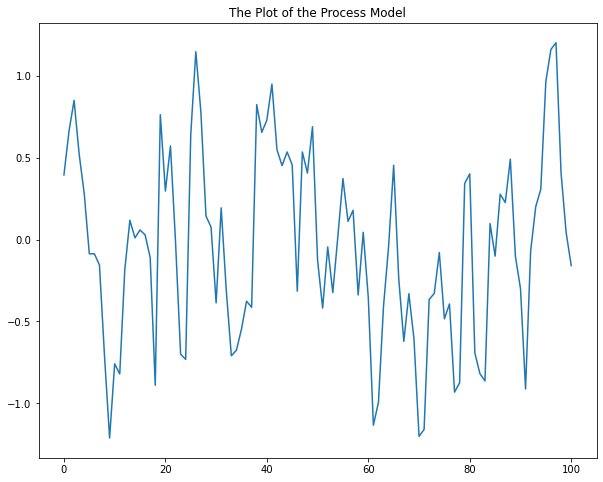

In [137]:
L=np.delete(x,[40,41,42,43,80,81,82,83,84]) 
plt.figure(figsize=(10,8))
plt.plot(tim,x)
plt.title("The Plot of the Process Model")
y =  DM(0.1,T)

###  Question II.d

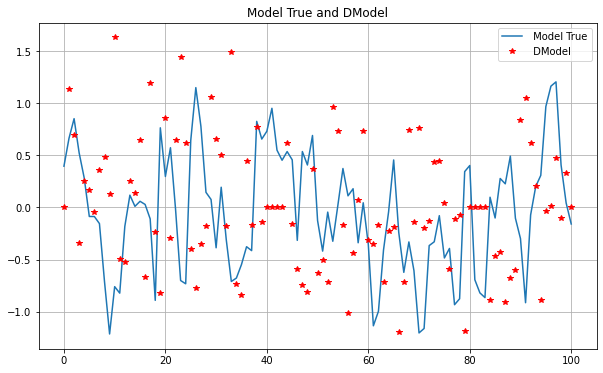

In [152]:
L= np.concatenate((np.arange(1,40) ,np.arange(44,80), np.arange(84,101)),axis=0) 
plt.figure(figsize=(10,6))
plt.plot(tim,x) 
plt.plot(tim,y,'r*') 
plt.title("Model True and DModel")
plt.legend([" Model True"," DModel"])
plt.grid()
plt.show()

###  Question II.e

In [108]:
def kalman(sigma,mu,r2,q2,alpha,y,T,h):
    gain = np.zeros(T+1)
    mu_new = np.zeros(T+1)
    sig_new = np.zeros(T+1)
    mu_old = alpha*mu
    sig_old = q2 + alpha*sig*alpha
    T2=[40,41,43,80,81,82,83]
  
    for i in range(1,T):
        if (i in T2)==False:
            gain[i] = sig_old*h*(h*sig_old*h+r2)**(-1) 
            mu_new[i] = mu_old
            mu_new[i] = mu_old + gain[i] * (y[i] - h*mu_old) 
            sig_new[i] = (1-gain[i]*h)*sig_old
    else:
        mu_old = alpha*mu_new[i]
        sig_old = q2 + alpha**2*sig_new[i]
    return mu_new,sig_new,gain

In [121]:
sigma = 1
h=1
alpha = 0.7
T = 100
mu = 0
q2 = 0.5
r2=0.1
y1 =  DM(0.1,T) 
k,j,i = kalman(sigma,mu,r2,q2,alpha,y1,T,h) 

In [122]:
k

array([ 0.        , -0.45299661, -0.40654119,  0.81505137,  0.7850038 ,
       -0.46034241, -0.02451856, -0.23654327,  0.06568323, -0.36232577,
        0.85263519, -1.42338556, -0.73290249, -0.27144171, -0.63022782,
       -0.75488569, -0.28963668,  0.44279083,  0.94779381, -0.23419408,
        0.51732531,  0.67511897, -0.94965419,  0.08511422,  0.51269635,
        0.23133178, -0.4895027 , -0.07132116,  0.38019608, -0.32508035,
        0.48821162,  0.56117051, -1.17201295,  0.80898559, -0.31862579,
        0.47656373, -0.44329309,  0.85166385,  0.29173152,  0.70195728,
        0.        ,  0.        ,  0.        ,  0.        , -0.33943601,
        0.46909766,  0.21929345, -0.59957438,  0.85574665, -0.66722076,
        0.29456707,  1.27842162, -0.6506972 , -0.0040806 ,  0.37102353,
       -0.23417006,  0.90540117,  0.66131985, -0.22452571, -0.60143224,
       -1.06539757, -1.21140413, -0.77593506, -0.57088796,  0.36453137,
       -0.71206345, -1.89826888, -0.90632361, -0.32947714, -0.26

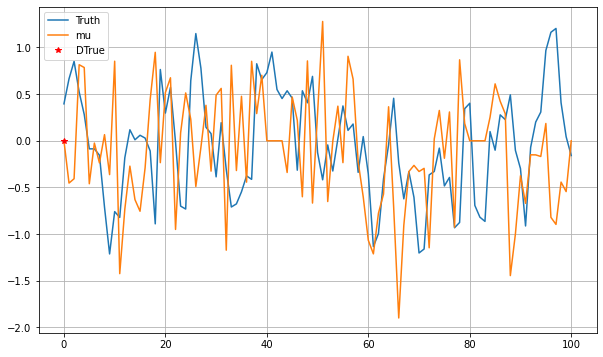

In [151]:
plt.figure(figsize=(10,6))
plt.plot(t,x) 
plt.plot(k) 
plt.plot(y[i],'r*') 
plt.grid()
plt.legend([ 'Truth','mu', 'DTrue',])
plt.show()

###  we can see that from the graph where there is no data there space between Tuth, mu and Data model

###  Question II.f

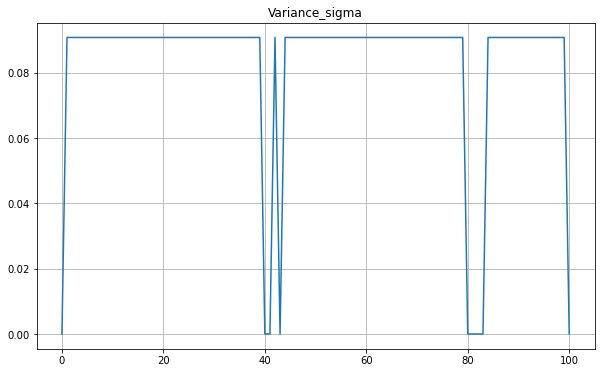

In [153]:
tim = np.arange(T+1)
plt.figure(figsize=(10,6))
plt.plot(tim,j)
plt.title('Variance_sigma')
plt.grid()

###  we can see that the highest value of sigma is at 40 and 80 